# Лабораторная работа №2

ФИО:   Толабаев Минкаил Адамович
Группа: БИВТ-22-СП-3

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить. 
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap. 

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 0. Пример импорта данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('JobSurveyIndia.csv')  

In [3]:
data

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K
...,...,...,...,...,...,...,...
395,395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
396,396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
397,397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K


In [4]:
data.head(3)

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K


In [5]:
data.tail(3)

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
397,397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K
399,399,Entrepreneurship,Non-Technical,Yes,No,6.0,900K-1200K


In [6]:
data

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K
...,...,...,...,...,...,...,...
395,395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
396,396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
397,397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K


### Колонки
* Employment Sector: Сектор в котором сотрудник хотел бы работать.
* Employment Background: Прошлая сфера работы сотрудника.
* Public Dealing: Будет ли публичная деятельность проблемой для сотрудника.
* Degree: Будет ли образование необходимо для идеального места работы сотрудника.
* IdealNumberOfWorkdays: Идеальное количество рабочих дней в неделю.
* IdealYearlyIncome: Идеальная зарплата за год.

## 2. Описание постановки задачи

Проведем EDA.

1. Распределение целевой переменной 
2. Основная информация по датасету
3. Дополнительный анализ

## 3. Распределение целевой переменной


In [7]:
Y = data['IdealYearlyIncome']
X = data.drop('IdealYearlyIncome', axis=1)

In [8]:
X

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays
0,0,Private Sector,Technical,No,Yes,4.0
1,1,Private Sector,Art,No,Yes,4.0
2,2,Government Sector,Technical,No,Yes,6.0
3,3,Government Sector,Non-Technical,Yes,Yes,4.0
4,4,Private Sector,Technical,No,Yes,5.0
...,...,...,...,...,...,...
395,395,Private Sector,Non-Technical,No,Yes,5.0
396,396,Government Sector,Non-Technical,Yes,No,4.0
397,397,Government Sector,Non-Technical,Yes,No,4.0
398,398,Government Sector,Non-Technical,No,No,5.0


In [9]:
Y

0      More Than 1500K
1            600K-900K
2           900K-1200K
3           900K-1200K
4          1200K-1500K
            ...       
395          600K-900K
396         900K-1200K
397         900K-1200K
398    More Than 1500K
399         900K-1200K
Name: IdealYearlyIncome, Length: 400, dtype: object

In [10]:
income_order = ['600K-900K', '900K-1200K', '1200K-1500K', 'More Than 1500K']
Y = pd.Categorical(Y, categories=income_order, ordered=True)

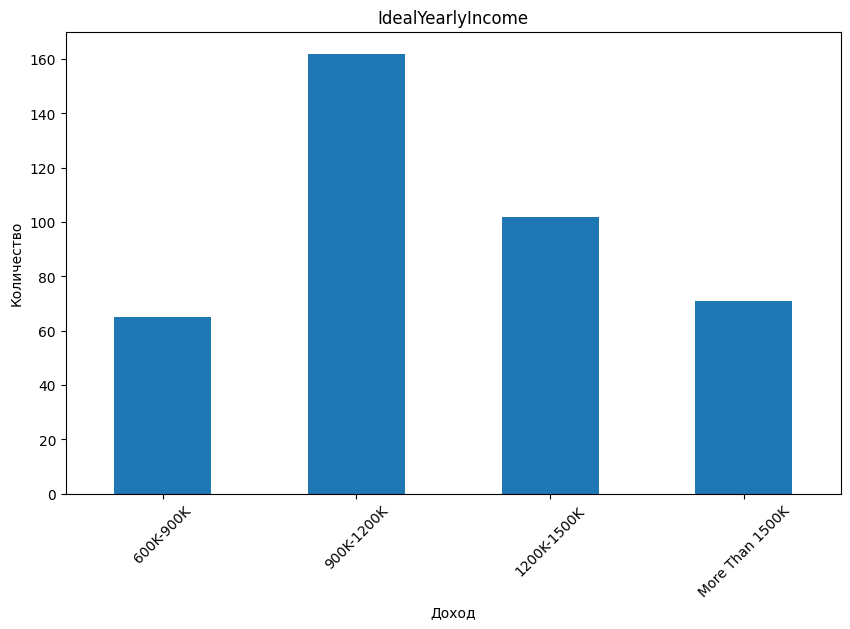

In [11]:
plt.figure(figsize=(10, 6))
Y.value_counts().plot(kind='bar')
plt.title('IdealYearlyIncome')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

## 4. Основные статистики


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             400 non-null    int64  
 1   Employment Sector      400 non-null    object 
 2   Employment Background  400 non-null    object 
 3   Public Dealing         400 non-null    object 
 4   Degree                 400 non-null    object 
 5   IdealNumberOfWorkdays  400 non-null    float64
 6   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


In [13]:
data.describe()

,Unnamed: 0,IdealNumberOfWorkdays
count,400.000000,400.000000
mean,199.500000,4.902500
std,115.614301,0.805989
min,0.000000,4.000000
25%,99.750000,4.000000
50%,199.500000,5.000000
75%,299.250000,5.000000
max,399.000000,7.000000


## 5. Основная информация по датасету

In [14]:
len(data.columns)

7

In [15]:
data.dtypes 

Unnamed: 0                 int64
Employment Sector         object
Employment Background     object
Public Dealing            object
Degree                    object
IdealNumberOfWorkdays    float64
IdealYearlyIncome         object
dtype: object

### Преобразрвание данных в str

In [16]:
data["Public Dealing"] = data["Public Dealing"].astype(str)
data["Employment Sector"] = data["Employment Sector"].astype(str)
data["Employment Background"] = data["Employment Sector"].astype(str)
data["Degree"] = data["Degree"].astype(str)

## 6. Количество пропусков

In [17]:
data.isna().sum() 

Unnamed: 0               0
Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

In [31]:
data.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


## 7. Гистограммы 5 признаков датасета

In [30]:
data

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K
...,...,...,...,...,...,...,...
395,395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
396,396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
397,397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K


In [20]:
features = ['Degree', 'Employment Background', 'Employment Sector', 'Public Dealing', 'IdealNumberOfWorkdays']

### Преобразование данных в Data


In [21]:
data['Degree'] = data['Degree'].str.strip()
data['Employment Background'] = data['Employment Background'].str.strip()
data['Public Dealing'] = data['Public Dealing'].replace({'No ': 'No'})

In [22]:
for feature in features:
    print(f"{X[feature].unique()}\n")

['Yes' 'Yes ' 'No']

['Technical' 'Art ' 'Non-Technical' 'Art']

['Private Sector' 'Government Sector' 'Entrepreneurship']

['No' 'No ' 'Yes']

[4. 6. 5. 7.]



### Преобразование данных в X


In [23]:
for feature in features:
    print(f"{X[feature].unique()}\n")

['Yes' 'Yes ' 'No']

['Technical' 'Art ' 'Non-Technical' 'Art']

['Private Sector' 'Government Sector' 'Entrepreneurship']

['No' 'No ' 'Yes']

[4. 6. 5. 7.]



In [24]:
X['Degree'] = X['Degree'].str.strip()
X['Employment Background'] = X['Employment Background'].str.strip()
X['Public Dealing'] = X['Public Dealing'].replace({'No ': 'No'})

In [25]:
data['Employment Background'] = X['Employment Background']

In [26]:
data

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K
...,...,...,...,...,...,...,...
395,395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
396,396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
397,397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K


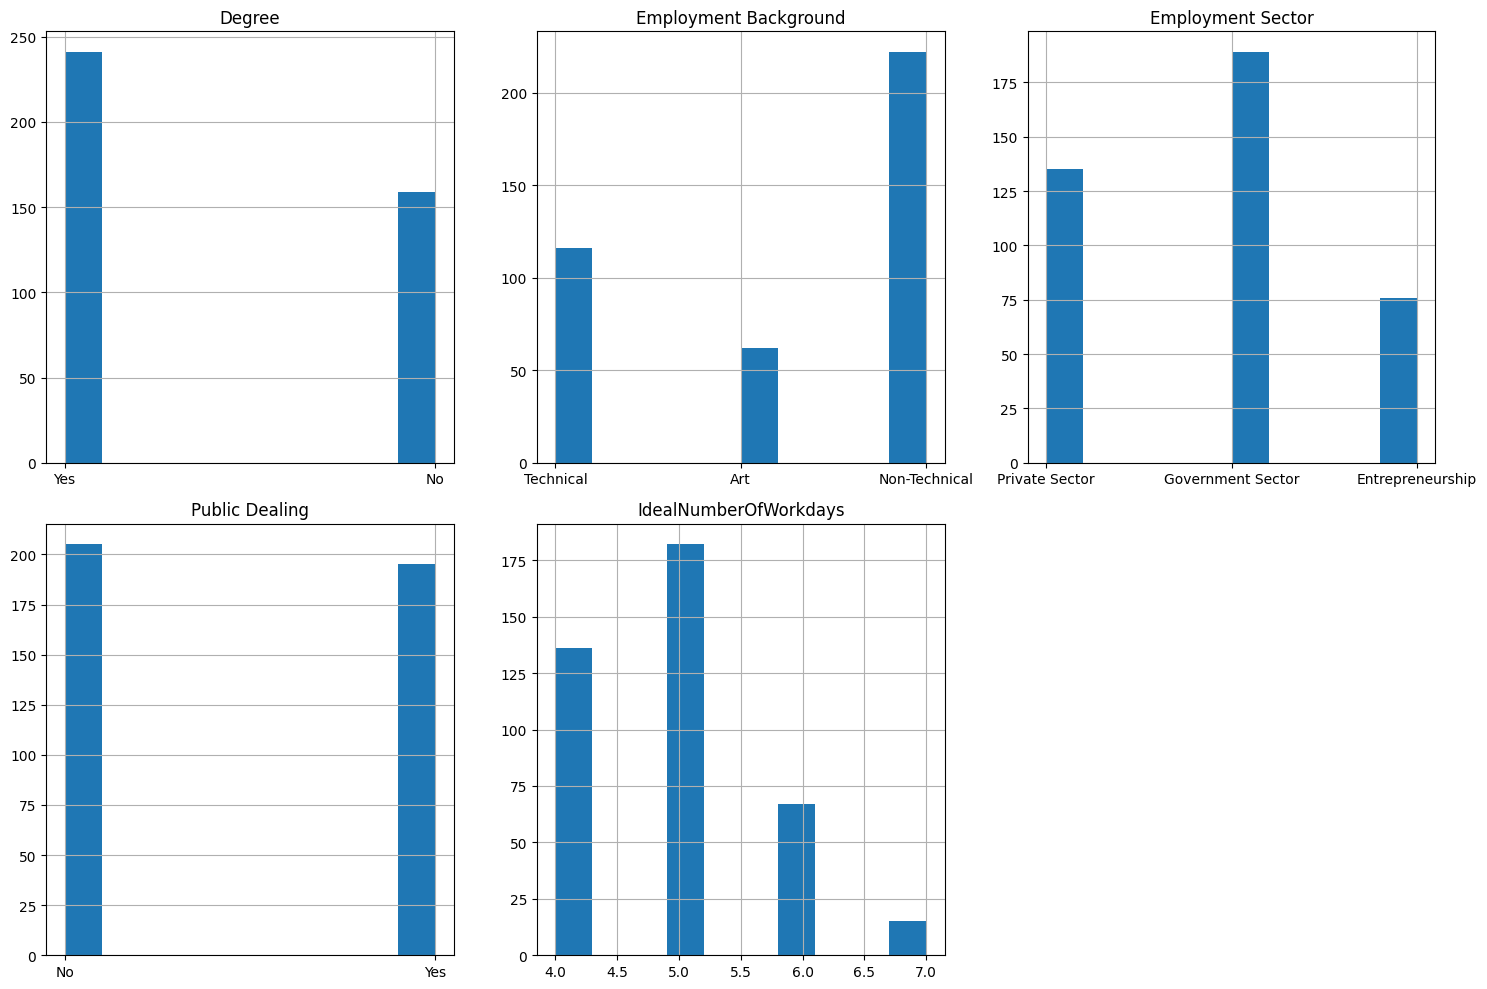

In [33]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, feature in enumerate(features):
   X[feature].hist(ax=axs[i])
   axs[i].set_title(feature)
   axs[i].tick_params(axis='x')

axs[5].remove()
plt.tight_layout()
plt.show()

## 8. Графики зависимости 5 переменных от целевой

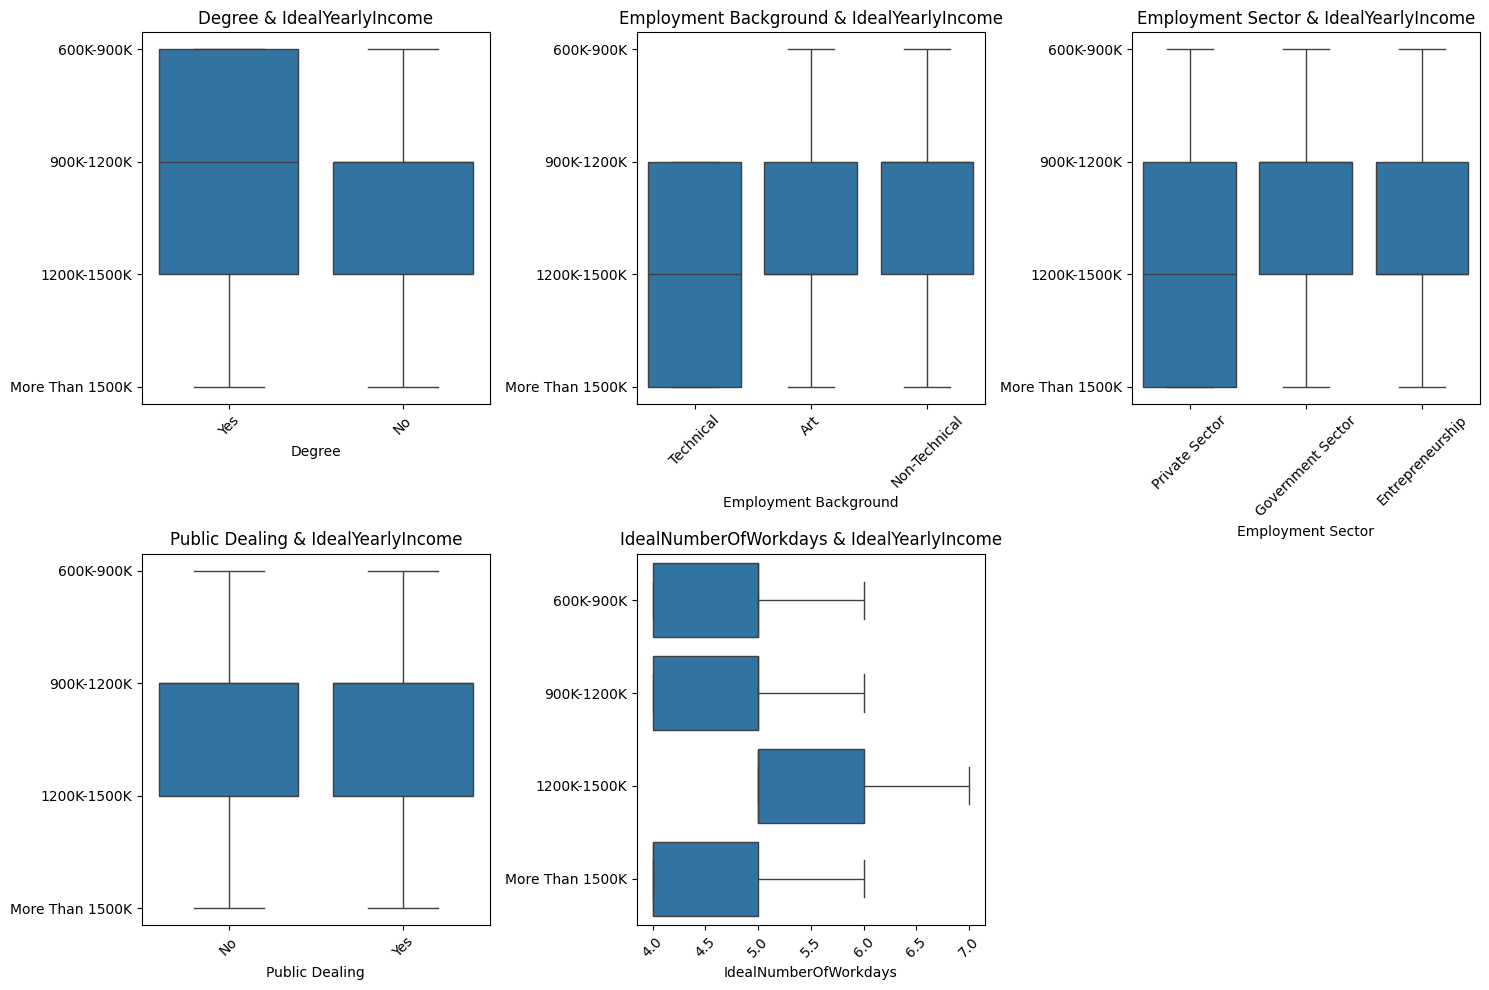

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
   sns.boxplot(data=data, x=feature, y=Y, ax=axes[i])
   axes[i].set_title(f'{feature} & IdealYearlyIncome')
   axes[i].tick_params(axis='x', rotation=45)

axes[5].remove()
plt.tight_layout()
plt.show()